# My dataset is: Who eats the food we grow?

### Research Question 1: Was there a year between 1961-2014 when more feed than food was produced worldwide?

In [11]:
# Import everything that is needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Read in the data
fao = pd.read_csv("FAO.csv", encoding="'latin-1'")
# The code are understood as numeric, but are categorical
fao["Area Code"] = fao["Area Code"].astype('category')
fao["Item Code"] = fao["Item Code"].astype('category')
fao["Element Code"] = fao["Element Code"].astype('category')

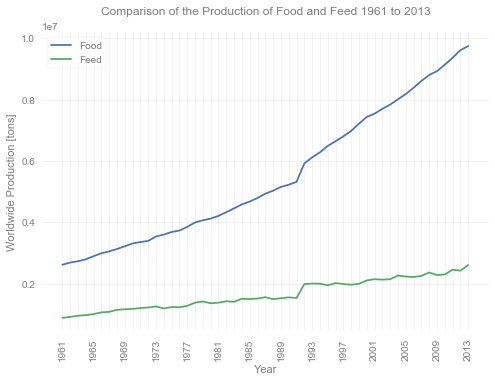

In [13]:
# Get the data
food = fao.loc[fao["Element"]=="Food",:].sum()[10:]
food.index = food.index.str.replace("Y", "")
feed = fao.loc[fao["Element"]=="Feed",:].sum()[10:]
feed.index = food.index.str.replace("Y", "")
# Plot food and feed. Here I used quite a lot of different formatting, so
# you can see many of the things you can modify

# I usually fix the alpha somewhere in a variable, so I can change it more easily 
# for all the parts where I use it
alpha = 0.6
# Plot the lines
plt.plot(food, label="Food")
plt.plot(feed, label="Feed")
# Get the current axes object
ax = plt.gca()
# Change the rotation of the ticklabels and only show every fourth
plt.xticks(rotation=90)
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
# Create a label and make it fit in more nicely
legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor("lightgray")
for text in legend.get_texts():
    plt.setp(text, alpha=alpha)
# Lalbel everything correctly
plt.ylabel("Worldwide Production [tons]", alpha=alpha)
plt.xlabel("Year", alpha=alpha)
plt.title("Comparison of the Production of Food and Feed 1961 to 2013\n", alpha=alpha)
# Get a nice grid in the background
ax.set_facecolor("white")
ax.grid(color="grey", alpha=0.1)
# Make the lalbels more nicer to read
plt.setp(ax.get_xticklabels(), alpha=alpha)
plt.setp(ax.yaxis.get_offset_text(), alpha=alpha)
plt.setp(ax.get_yticklabels(), alpha=alpha)

# Finally show the beauty
plt.show()


### Research Question 2: Are food and feed production correlated or do they follow different trends?

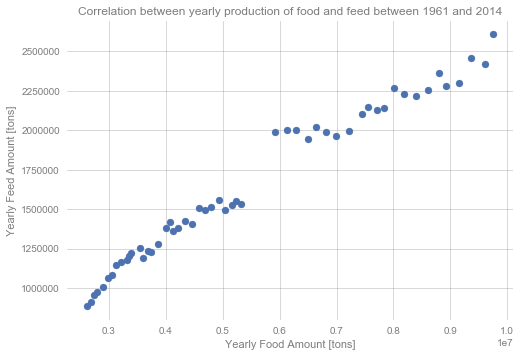

In [37]:
alpha = 0.6
# Get the data
food = fao.loc[fao["Element"]=="Food",:].sum()[10:]
feed = fao.loc[fao["Element"]=="Feed",:].sum()[10:]
# Plot
plt.scatter(food, feed)
ax = plt.gca()
ax.set_facecolor("white")
ax.grid(color="grey", alpha=0.3, linestyle="-")
# Make the lalbels more nicer to read
plt.setp(ax.get_xticklabels(), alpha=alpha)
plt.setp(ax.xaxis.get_offset_text(), alpha=alpha)
plt.setp(ax.get_yticklabels(), alpha=alpha)
# Add the labels
plt.xlabel("Yearly Food Amount [tons]", alpha=alpha)
plt.ylabel("Yearly Feed Amount [tons]", alpha=alpha)
plt.title("Correlation between yearly production of food and feed between 1961 and 2014", alpha=alpha)
plt.show()

### Research Question 3: Do we produce more food on the southern or the northern hemisphere?

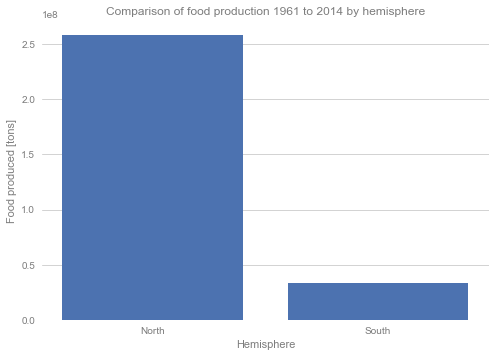

In [44]:
# 7.7
# Create the right column names with list comprehension
years = ["Y" + str(year) for year in range(1961, 2014)]
# Get the data
food = fao.loc[fao["Element"]=="Food",:]
food_north = food.loc[food["latitude"] > 0,:][years].sum().sum()
food_south = food.loc[food["latitude"] < 0,:][years].sum().sum()
# Plot the data
plt.bar(x=["North", "South"], height=[food_north, food_south])
alpha = 0.6
# Add labels
plt.ylabel("Food produced [tons]", alpha=alpha)
plt.xlabel("Hemisphere", alpha=alpha)
plt.title("Comparison of food production 1961 to 2014 by hemisphere", alpha=alpha)
# Make the lalbels more nicer to read
ax = plt.gca()
plt.setp(ax.get_xticklabels(), alpha=alpha)
plt.setp(ax.yaxis.get_offset_text(), alpha=alpha)
plt.setp(ax.get_yticklabels(), alpha=alpha)
# Make the grid more useful
ax.grid(False)
ax.set_facecolor("white")
ax.yaxis.grid(True, color="lightgrey")

plt.show()